Building a simple fully-connected NN with an encoder and decoder

In [1]:
import keras
from keras import layers

#size of encoded input
encoding_dim = 32
input_img = keras.Input(shape=(784,))
#create an encoded layer as a dense layer
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
#decoded layer
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [2]:
#separate encoder model
encoder = keras.Model(input_img, encoded)

In [3]:
#separate decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
#retrieve last layer of autoencoder
decoder_layer = autoencoder.layers[-1]
#create model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
#compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [5]:
#load mnist digits dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
#normalize: flatten, grayscale, make into 1D vector
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
#train autoencoder for 5 epochs
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data = (x_test,x_test)
                )

Epoch 1/5
235/235 [==============================] - 13s 6ms/step - loss: 0.3849 - accuracy: 0.0084 - val_loss: 0.1872 - val_accuracy: 0.0094
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1778 - accuracy: 0.0105 - val_loss: 0.1526 - val_accuracy: 0.0081
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1483 - accuracy: 0.0092 - val_loss: 0.1336 - val_accuracy: 0.0077
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1312 - accuracy: 0.0099 - val_loss: 0.1209 - val_accuracy: 0.0099
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1197 - accuracy: 0.0099 - val_loss: 0.1122 - val_accuracy: 0.0116


In [8]:
#encode and decode some imgs from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

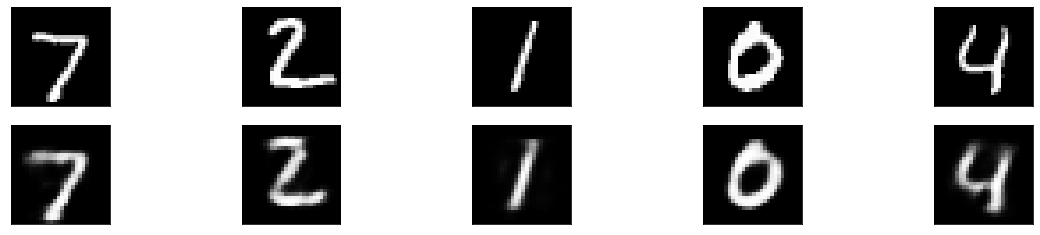

In [9]:
#display 5 imgs
import matplotlib.pyplot as plt

n = 5  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    #original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstructed img
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#more or less the same, just a bit more lossy

Apply a sparsity constraint to generate a higher-quality output.
- Sparsity constraints reconstruct the loss function to achieve a "bottleneck" information system. Only a few neurons are activated when a sample is fed

In [10]:
from keras import regularizers
#use a regularizer
encoding_dim = 32

input_img = keras.Input(shape=(784,))
#Dense layer with a L1  regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Use a stack of hidden layers instead of just one - will create a better output and more complex model

In [11]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.3327 - accuracy: 0.0094 - val_loss: 0.1617 - val_accuracy: 0.0097
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1530 - accuracy: 0.0115 - val_loss: 0.1343 - val_accuracy: 0.0124
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1330 - accuracy: 0.0120 - val_loss: 0.1231 - val_accuracy: 0.0105
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1224 - accuracy: 0.0110 - val_loss: 0.1164 - val_accuracy: 0.0133
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1169 - accuracy: 0.0107 - val_loss: 0.1118 - val_accuracy: 0.0108
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1120 - accuracy: 0.0124 - val_loss: 0.1086 - val_accuracy: 0.0109
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1087 - accuracy: 0.0098 - val_loss: 0.1056 - val_accuracy: 0.0106
Epoch 

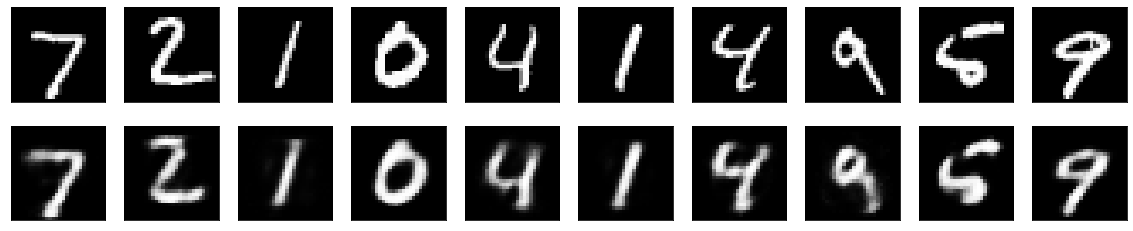

In [13]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#looks slightly better with more training epochs and more layers

Use a ConvNet as an encoder and a decoder - can use UpSampling2D and Conv2D layers to create a more complex model

In [14]:
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

#adding MaxPooling2D and Conv2D as the encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


#creating decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#compile model
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
#normalize MNIST digits data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [16]:
#use tensorboard to visualize training
!tensorboard --logdir=/tmp/autoencoder

2021-07-28 18:49:58.348106: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.5.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [17]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 7s 8ms/step - loss: 0.3165 - val_loss: 0.1514
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1456 - val_loss: 0.1310
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1296 - val_loss: 0.1226
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1221 - val_loss: 0.1177
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1177 - val_loss: 0.1143
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1143 - val_loss: 0.1114
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1118 - val_loss: 0.1091
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1098 - val_loss: 0.1073
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1082 - val_loss: 0.1067
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1070 - val_loss: 0.1050

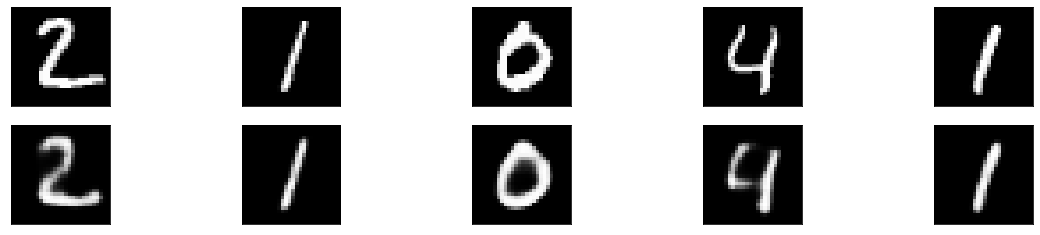

In [18]:
#show 5 decoded imgs with MPL
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    #original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstructed
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#much less lossy using the CNN

Generating noisy digits, then clean them with the Autoencoder

In [19]:
#use digits dataset to apply noise

#applying noise: apply Gaussian noise matrix

(x_train, _), (x_test, _) = mnist.load_data()


#normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#define noise factor and test/train shape
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

#define train and test
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

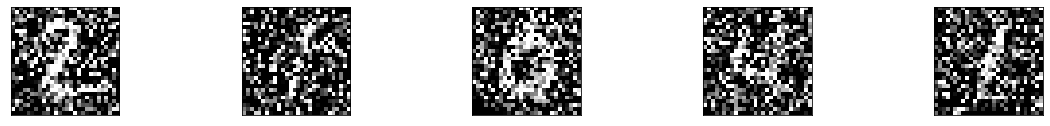

In [20]:
#show 5 noisy images

n=5
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
#create a similar CNN network for the enc/dec, but with more filters
input_img = keras.Input(shape=(28, 28, 1))

#create encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#create decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [22]:
#train the AE with 50 epochs
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose = 2
                )

Epoch 1/50
469/469 - 4s - loss: 0.1939 - accuracy: 0.8010 - val_loss: 0.1460 - val_accuracy: 0.8058
Epoch 2/50
469/469 - 3s - loss: 0.1421 - accuracy: 0.8066 - val_loss: 0.1362 - val_accuracy: 0.8057
Epoch 3/50
469/469 - 3s - loss: 0.1352 - accuracy: 0.8079 - val_loss: 0.1317 - val_accuracy: 0.8082
Epoch 4/50
469/469 - 3s - loss: 0.1314 - accuracy: 0.8086 - val_loss: 0.1286 - val_accuracy: 0.8078
Epoch 5/50
469/469 - 3s - loss: 0.1292 - accuracy: 0.8089 - val_loss: 0.1273 - val_accuracy: 0.8091
Epoch 6/50
469/469 - 3s - loss: 0.1276 - accuracy: 0.8091 - val_loss: 0.1257 - val_accuracy: 0.8077
Epoch 7/50
469/469 - 3s - loss: 0.1264 - accuracy: 0.8093 - val_loss: 0.1244 - val_accuracy: 0.8087
Epoch 8/50
469/469 - 3s - loss: 0.1254 - accuracy: 0.8095 - val_loss: 0.1235 - val_accuracy: 0.8086
Epoch 9/50
469/469 - 3s - loss: 0.1246 - accuracy: 0.8096 - val_loss: 0.1229 - val_accuracy: 0.8085
Epoch 10/50
469/469 - 3s - loss: 0.1237 - accuracy: 0.8097 - val_loss: 0.1221 - val_accuracy: 0.8085

End accuracy: 81%

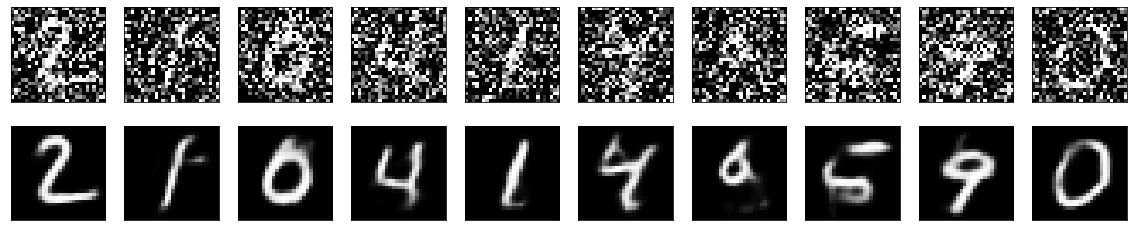

In [23]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#much clearer than before

Using a Variational Autoencoder with the MNIST dataset
- Can generate new input: "Generative Model"
- Makes sure the latent space has a good distrib of data by diving the input into 2 params
- takes points off of the latent space and actually CONSTRUCTS a new output

In [24]:
#define dimensions
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

#split latent space into two params: z_mean and z_log_sigma
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [25]:
from keras import backend as K

#function for sampling in the latent space
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [26]:
#create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

#create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

#instantiate vae
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [27]:
#define custom loss func
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
#compile with adam opt
vae.compile(optimizer='adam')

In [29]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#train
vae.fit(x_train, x_train,
        epochs=20,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 162.3150 - val_loss: 161.4273
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 160.0779 - val_loss: 159.3926
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 158.3779 - val_loss: 157.8153
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 156.8752 - val_loss: 156.4107
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 155.5451 - val_loss: 155.3867
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 154.5116 - val_loss: 154.3158
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 153.6759 - val_loss: 153.6696
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 153.0237 - val_loss: 152.9767
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 152.4877 - val_loss: 152.5955
Epoch 10/20
1875/1875 [=======================

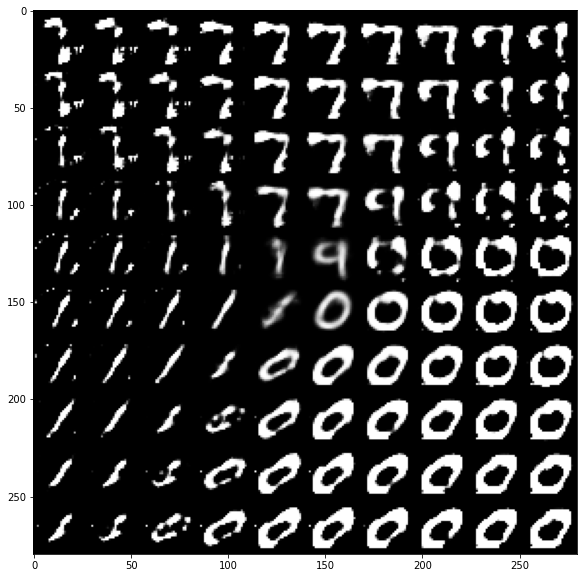

In [31]:
#generate figs based on latent space samples
n = 10 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
#sample 10 points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

#create plot
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()
